In [35]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Estimación de Sistema de Primer Orden con Mínimos con regularización

Se tiene un sistema dado por la siguiente relación:

$$y(t) = \theta_0.x(t) + \theta_1.\frac{dy}{dt}$$

En tiempo discreto se tendría lo siguiente:

$$y[k] = \theta_0.x[k] + \theta_1.y[k-1]$$

Por tanto el modelo estaría dado por:

$$y[k] = \phi.\theta$$

Donde:
$$\phi = \begin{bmatrix}x[k]&y[k-1]\end{bmatrix}$$

In [36]:
## Generando los valores medidos a partir 
## de un valor ideal contaminado por ruido
t = np.linspace([0],[20],100)
x = np.linspace([5],[5],100)
y1 = np.linspace([0],[0],100)
y = 5*(1-np.exp(-2*t))
r = 0.2
yn = y + np.random.normal(0,r,t.shape)
### Creando el arreglo y[n-1]
for k in range(1,len(yn)):
    y1[[k]]=yn[[k-1]]

## Creación del vector phi
phi = np.concatenate((x, y1), axis=1)


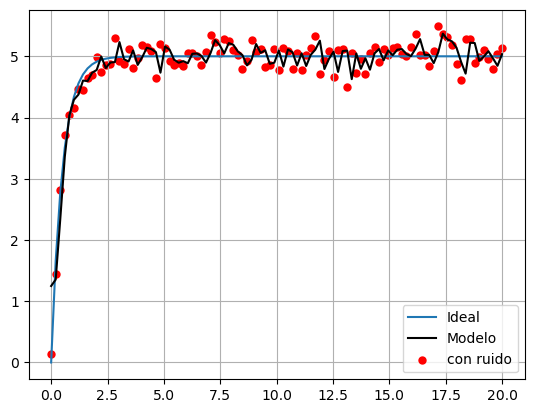

In [39]:
alpha = 1            #Valor de regularización
A = np.dot(phi.T,phi)+alpha*np.eye(2)
p_estimado = np.dot(np.linalg.inv(A),np.dot(phi.T,yn))

y_estimado = p_estimado[[0]]*x + p_estimado[[1]]*y1

plt.plot(t,y)
plt.plot(t,y_estimado,color = 'black')
plt.scatter(t,yn,color = 'red',linewidths= 0.01)
plt.legend(['Ideal','Modelo','con ruido'])
plt.grid()